In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("train.csv")#, usecols=["class", "viewCount", "commentCount", "likeCount", "dislikeCount", "title", "description"]) 
test_data = pd.read_csv("test.csv")#, usecols=["ID","viewCount", "commentCount", "likeCount", "dislikeCount", "title", "description"])

In [4]:
train_data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
members = train_data["cast"]

num_cast = []

for i in members:
    if isinstance(i, str):
        number = sum(1 for c in i if c == "{")
        num_cast.append(number)
    else:
        num_cast.append(0)

train_data["num_cast"] = num_cast

In [64]:
num_male_cast = []
num_female_cast = []
num_unspecified_cast = []

substring_male = " 'gender': 2"
substring_female = " 'gender': 1"
substring_unspecified = " 'gender': 0"

for i in members:
    if isinstance(i, str):
        males = i.count(substring_male)
        num_male_cast.append(males)
    
        females = i.count(substring_female)
        num_female_cast.append(females)
    
        unspecified = i.count(substring_unspecified)
        num_unspecified_cast.append(unspecified)
    else:
        num_male_cast.append(0)
        num_female_cast.append(0)
        num_unspecified_cast.append(0)

train_data["num_male_cast"] = num_male_cast
train_data["num_female_cast"] = num_female_cast
train_data["num_unspecified_cast"] = num_unspecified_cast

train_data["cast_ratio_male"] = train_data["num_male_cast"] / (train_data["num_male_cast"] + train_data["num_female_cast"] + train_data["num_unspecified_cast"])
train_data["cast_ratio_female"] = train_data["num_female_cast"] / (train_data["num_male_cast"] + train_data["num_female_cast"] + train_data["num_unspecified_cast"])
train_data["cast_ratio_unspecified"] = train_data["num_unspecified_cast"] / (train_data["num_male_cast"] + train_data["num_female_cast"] + train_data["num_unspecified_cast"])

'[{\'credit_id\': \'59ac067c92514107af02c8c8\', \'department\': \'Directing\', \'gender\': 0, \'id\': 1449071, \'job\': \'First Assistant Director\', \'name\': \'Kelly Cantley\', \'profile_path\': None}, {\'credit_id\': \'52fe4ee7c3a36847f82afad7\', \'department\': \'Directing\', \'gender\': 2, \'id\': 3227, \'job\': \'Director\', \'name\': \'Steve Pink\', \'profile_path\': \'/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg\'}, {\'credit_id\': \'5524ed25c3a3687ded000d88\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Writer\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed2d925141720c001128\', \'department\': \'Writing\', \'gender\': 2, \'id\': 347335, \'job\': \'Characters\', \'name\': \'Josh Heald\', \'profile_path\': \'/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg\'}, {\'credit_id\': \'5524ed3d92514166c1004a5d\', \'department\': \'Production\', \'gender\': 2, \'id\': 57822, \'job\': \'Producer\', \'name\': \'Andrew Panay\', \

In [71]:
crew = train_data["crew"]

num_male_crew = []
num_female_crew = []
num_unspecified_crew = []

substring_male = "'gender\': 2"
substring_female = "'gender\': 1"
substring_unspecified = "'gender\': 0"

for i in crew:
    if isinstance(i, list):
        string = str(i)
        males = string.count(substring_male)
        num_male_crew.append(males)
    
        females = string.count(substring_female)
        num_female_crew.append(females)
    
        unspecified = string.count(substring_unspecified)
        num_unspecified_crew.append(unspecified)
    else:
        num_male_crew.append(0)
        num_female_crew.append(0)
        num_unspecified_crew.append(0)

train_data["num_male_crew"] = num_male_crew
train_data["num_female_crew"] = num_female_crew
train_data["num_unspecified_crew"] = num_unspecified_crew

train_data["crew_ratio_male"] = train_data["num_male_crew"] / (train_data["num_male_crew"] + train_data["num_female_crew"] + train_data["num_unspecified_crew"])
train_data["crew_ratio_female"] = train_data["num_female_crew"] / (train_data["num_male_crew"] + train_data["num_female_crew"] + train_data["num_unspecified_crew"])
train_data["crew_ratio_unspecified"] = train_data["num_unspecified_crew"] / (train_data["num_male_crew"] + train_data["num_female_crew"] + train_data["num_unspecified_crew"])

In [72]:
train_data.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,num_unspecified_cast,cast_ratio_male,cast_ratio_female,cast_ratio_unspecified,num_male_crew,num_female_crew,num_unspecified_crew,crew_ratio_male,crew_ratio_female,crew_ratio_unspecified
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,6,0.416667,0.333333,0.250000,13,0,59,0.180556,0.000000,0.819444
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0.500000,0.500000,0.000000,4,4,1,0.444444,0.444444,0.111111
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,31,0.254902,0.137255,0.607843,11,4,49,0.171875,0.062500,0.765625
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,4,0.285714,0.142857,0.571429,0,0,3,0.000000,0.000000,1.000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0,1.000000,0.000000,0.000000,0,0,2,0.000000,0.000000,1.000000


In [32]:
import collections

gender_labels = {0: "unspecified", 1: "female", 2: "male"}
# Now let's look at the distribution of values
gender_list_list = list(train_data.crew.apply(lambda x: [cm["gender"] for cm in x]).values)
gender_list = [gender for gender_list in gender_list_list for gender in gender_list]
gender_counter = collections.Counter(gender_list)
#print("Number of crew members by gender:", gender_counter)
gender_indexes = np.arange(len(gender_counter))
genders = pd.DataFrame(gender_list)

In [33]:
genders

,0
0,0
1,2
2,2
3,2
4,2
5,0
6,2
7,0
8,2
9,2


In [6]:
companies = train_data["production_companies"]

first = []
second = []
third = []
fourth = []
fifth = []

for string in companies:
    if isinstance(string, str):
        splits = string.split("'")
        company1 = splits[3]
        first.append(company1)
        multiples1 = splits[7:]
        if not multiples1:
            second.append('NA')
        else:
            company2 = multiples1[2]
            second.append(company2)
        multiples2 = multiples1[7:]
        if not multiples2:
            third.append('NA')
        else:
            company3 = multiples2[1]
            third.append(company3)
        multiples3 = multiples2[6:]
        if not multiples3:
            fourth.append('NA')
        else:
            company4 = multiples3[1]
            fourth.append(company4)
        multiples4 = multiples3[5:]
        if not multiples4:
            fifth.append('NA')
        else:
            company5 = multiples4[2]
            fifth.append(company5)
    else:
        first.append('NA')
        second.append('NA')
        third.append('NA')
        fourth.append('NA')
        fifth.append('NA')

prod_companies = list(zip(first, second, third, fourth, fifth))
train_data["prod_companies"] = prod_companies

In [7]:
genres = train_data["genres"]

first = []
second = []
third = []
fourth = []
fifth = []
sixth = []
seventh = []

for string in genres:
    if isinstance(string, str):
        splits = string.split("'")
        genre1 = splits[5]
        first.append(genre1)
        multiples1 = splits[7:]
        if not multiples1:
            second.append('NA')
        else:
            genre2 = multiples1[4]
            second.append(genre2)
        multiples2 = multiples1[7:]
        if not multiples2:
            third.append('NA')
        else:
            genre3 = multiples2[3]
            third.append(genre3)
        multiples3 = multiples2[6:]
        if not multiples3:
            fourth.append('NA')
        else:
            genre4 = multiples3[3]
            fourth.append(genre4)
        multiples4 = multiples3[5:]
        if not multiples4:
            fifth.append('NA')
        else:
            genre5 = multiples4[4]
            fifth.append(genre5)
        multiples5 = multiples4[6:]
        if not multiples5:
            sixth.append('NA')
        else:
            genre6 = multiples5[4]
            sixth.append(genre6)
        multiples6 = multiples5[6:]
        if not multiples6:
            seventh.append('NA')
        else:
            genre7 = multiples6[4]
            seventh.append(genre7)
    else:
        first.append('NA')
        second.append('NA')
        third.append('NA')
        fourth.append('NA')
        fifth.append('NA')
        sixth.append('NA')
        seventh.append('NA')

genres_list = list(zip(first, second, third, fourth, fifth, sixth, seventh))
train_data["genres_list"] = genres_list

In [8]:
prod_country = train_data["production_countries"]

prod_in_US = []
num_prod_countries = []

for string in prod_country:
    if isinstance(string, str):
        splits = string.split("'")
        usa = 0
        for x in splits:
            if x == "United States of America":
                usa = 1
        prod_in_US.append(usa)
        
        number = sum(1 for c in string if c == "{")
        num_prod_countries.append(number)
    else:
        prod_in_US.append(0)
        num_prod_countries.append(0)
            
train_data["prod_in_US"] = prod_in_US
train_data["num_prod_countries"] = num_prod_countries

In [9]:
collections = train_data["belongs_to_collection"]

coll_list = []

for string in collections:
    if isinstance(string, str):
        coll_list.append(1)
    else:
        coll_list.append(0)
        
train_data["collection"] = coll_list

In [10]:
genresInMovie = train_data["genres_list"]

action = []
adventure = []
animation = []
comedy = []
crime = []
documentary = []
drama = []
family = []
fantasy = []
foreign = []
horror = []
music = []
mystery = []
romance = []
scifi = []
thriller = []

for movie in genresInMovie:
    movie = list(movie)
    
    isAction = 0
    isAdventure = 0
    isAnimation = 0
    isComedy = 0
    isCrime = 0
    isDocumentary = 0
    isDrama = 0
    isFamily = 0
    isFantasy = 0
    isForeign = 0
    isHorror = 0
    isMusic = 0
    isMystery = 0
    isRomance = 0
    isSciFi = 0
    isThriller = 0
    
    for genre in movie:
        if genre == "Action":
            isAction = 1
        if genre == "Adventure":
            isAdventure = 1
        if genre == "Animation":
            isAnimation = 1
        if genre == "Comedy":
            isComedy = 1
        if genre == "Crime":
            isCrime = 1
        if genre == "Documentary":
            isDocumentary = 1
        if genre == "Drama":
            isDrama = 1
        if genre == "Family":
            isFamily = 1
        if genre == "Fantasy":
            isFantasy = 1
        if genre == "Foreign":
            isForeign = 1
        if genre == "Horror":
            isHorror = 1
        if genre == "Music":
            isMusic = 1
        if genre == "Mystery":
            isMystery = 1
        if genre == "Romance":
            isRomance = 1
        if genre == "Science Fiction":
            isSciFi = 1
        if genre == "Thriller":
            isThriller = 1
            
    action.append(isAction)
    adventure.append(isAdventure)
    animation.append(isAnimation)
    comedy.append(isComedy)
    crime.append(isCrime)
    documentary.append(isDocumentary)
    drama.append(isDrama)
    family.append(isFamily)
    fantasy.append(isFantasy)
    foreign.append(isForeign)
    horror.append(isHorror)
    music.append(isMusic)
    mystery.append(isMystery)
    romance.append(isRomance)
    scifi.append(isSciFi)
    thriller.append(isThriller)
    
train_data["isAction"] = action
train_data["isAdventure"] = adventure
train_data["isAnimation"] = animation
train_data["isComedy"] = comedy
train_data["isCrime"] = crime
train_data["isDocumentary"] = documentary
train_data["isDrama"] = drama
train_data["isFamily"] = family
train_data["isFantasy"] = fantasy
train_data["isForeign"] = foreign
train_data["isHorror"] = horror
train_data["isMusic"] = music
train_data["isMystery"] = mystery
train_data["isRomance"] = romance
train_data["isSciFi"] = scifi
train_data["isThriller"] = thriller

In [11]:
companies = train_data["prod_companies"]

universal = []
warner = []
columbia = []
disney = []
marvel = []
paramount = []
fox = []
ratpac = []
legendary = []
relativity = []
other = []

for movie in companies:
    movie = list(movie)
    
    byUniversal = 0
    byWarner = 0
    byColumbia = 0
    byDisney = 0
    byMarvel = 0
    byParamount = 0
    byFox = 0
    byRatPac = 0
    byLegendary = 0
    byRelativity = 0
    byOther = 0
    
    for company in movie:
        if company == "Universal Pictures":
            byUniversal = 1
        if company == "Warner Bros.":
            byWarner = 1
        if company == "Columbia Pictures Corporation":
            byColumbia = 1
        if company == "Walt Disney Pictures":
            byDisney = 1
        if company == "Marvel Studios":
            byMarvel = 1
        if company == "Paramount Productions":
            byParamount = 1
        if company == "20th Century Fox Home Entertainment":
            byFox = 1
        if company == "RatPac-Dune Entertainment":
            byCompany = 1
        if company == "Legendary Pictures":
            byLegendary = 1
        if company == "Relativity Media":
            byRelativity = 1
    if (byUniversal + byWarner + byColumbia + byDisney + byMarvel + byParamount + byFox + byRatPac + byLegendary + byRelativity == 0):
        byOther = 1
            
    universal.append(byUniversal)
    warner.append(byWarner)
    columbia.append(byColumbia)
    disney.append(byDisney)
    marvel.append(byMarvel)
    paramount.append(byParamount)
    fox.append(byFox)
    ratpac.append(byRatPac)
    legendary.append(byLegendary)
    relativity.append(byRelativity)
    other.append(byOther)
    
train_data["byUniversal"] = universal
train_data["byWarner"] = warner
train_data["byColumbia"] = columbia
train_data["byDisney"] = disney
train_data["byMarvel"] = marvel
train_data["byParamount"] = paramount
train_data["byFox"] = fox
train_data["byRatPac"] = ratpac
train_data["byLegendary"] = legendary
train_data["byRelativity"] = relativity
train_data["byOther"] = other

In [13]:
train_data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
num_cast                    0
prod_companies              0
genres_list                 0
prod_in_US                  0
num_prod_countries          0
collection                  0
isAction                    0
isAdventure                 0
isAnimation                 0
isComedy                    0
isCrime   

(0, 20)

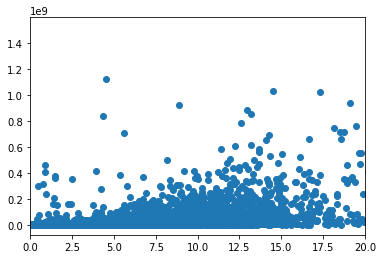

In [12]:
plt.scatter(train_data['popularity'], train_data['revenue'])
plt.xlim(0,20)

(50, 200)

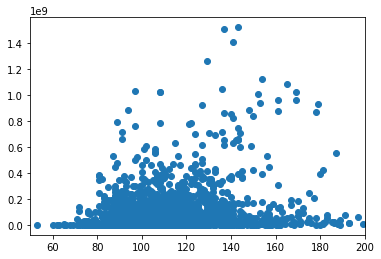

In [13]:
plt.scatter(train_data['runtime'], train_data['revenue'])
plt.xlim(50,200)

In [14]:
train_data['month'] = pd.DatetimeIndex(train_data['release_date']).month
train_data['year'] = pd.DatetimeIndex(train_data['release_date']).year

In [15]:
dfMonth = train_data["month"]
dfMonth["revenue"] = train_data["revenue"]

C:\Users\owenf\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
dfMonth.boxplot(by = 'month')

AttributeError: 'Series' object has no attribute 'boxplot'

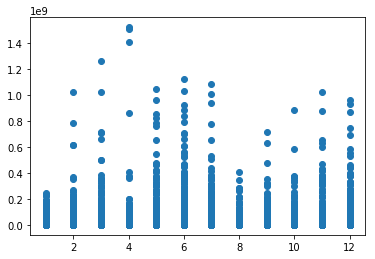

In [17]:
plt.scatter(train_data['month'], train_data['revenue'])

In [18]:
def remove_colinear_features(x, threshold):
    y = x['revenue']
    x = x.drop(columns = ['revenue'])
    
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            if val >= threshold:
                drop_cols.append(col.values[0])
                
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    
    x['revenue'] = y
    
    return drops

In [19]:
x = remove_colinear_features(train_data, 0.6)

In [20]:
x

set()